In [1]:
import pandas as pd
import numpy as np
import re
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import spacy

## Load DataFrame

In [2]:
df = pd.read_csv('final_df.csv', index_col = 0)

In [3]:
df = df[['artist', 'lyrics', 'genre']]
df.shape

(401817, 3)

## Clean up lyrics and lemmatize

In [4]:
# clean lyrics column (get rid of punctuation, lowercase, and line breaks)
cleanText(df, 'lyrics', 'clean_lyrics')

In [4]:
# load spacy
nlp = spacy.load('en_core_web_md')

In [6]:
# use spacy lemmatizer to lemmatize clean_lyrics column
df['cleaned_lemmed_lyrics'] = df["clean_lyrics"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [13]:
# save lemmatized dataframe
df.to_csv('lemmed_data.csv')

In [2]:
# load lemmatized dataframe (to save from lemmatizing again)
df = pd.read_csv('lemmed_data.csv', index_col = 0)

In [3]:
df = df[['artist', 'lyrics', 'clean_lyrics', 'cleaned_lemmed_lyrics', 'genre']]
df.shape

(401817, 5)

In [4]:
df.head()

,artist,lyrics,clean_lyrics,cleaned_lemmed_lyrics,genre
0,Ariana Grande,"I looked in my rearview mirror, (ah) and it s...",i looked in my rearview mirror ah and it seem...,i look in -PRON- rearview mirror ah and -PRO...,Pop/R&B
1,Ariana Grande,"Baby, I got love for thee so deep inside of m...",baby i got love for thee so deep inside of me...,baby i get love for thee so deep inside of -...,Pop/R&B
2,Ariana Grande,"(If you wanna party, if you, if you wanna par...",if you wanna party if you if you wanna party ...,if -PRON- wanna party if -PRON- if -PRON- wa...,Pop/R&B
3,Ariana Grande,(Sha-la-la-la-la-la-la...)<br/>You don't need...,sha la la la la la la br you dont need a lot ...,sha la la la la la la br -PRON- do not need ...,Pop/R&B
4,Ariana Grande,"Baby, don't you know you got all my love, all...",baby dont you know you got all my love all my...,baby do not -PRON- know -PRON- get all -PRON...,Pop/R&B


## Split song into lines and get number of lines

In [5]:
df['lines'] = df['clean_lyrics'].apply(num_lines)

In [6]:
df['num_lines'] = df['lines'].apply(lambda x: len(x))

In [7]:
df

,artist,lyrics,clean_lyrics,cleaned_lemmed_lyrics,genre,lines,num_lines
0,Ariana Grande,"I looked in my rearview mirror, (ah) and it s...",i looked in my rearview mirror ah and it seem...,i look in -PRON- rearview mirror ah and -PRO...,Pop/R&B,[ i looked in my rearview mirror ah and it see...,44
1,Ariana Grande,"Baby, I got love for thee so deep inside of m...",baby i got love for thee so deep inside of me...,baby i get love for thee so deep inside of -...,Pop/R&B,[ baby i got love for thee so deep inside of m...,42
2,Ariana Grande,"(If you wanna party, if you, if you wanna par...",if you wanna party if you if you wanna party ...,if -PRON- wanna party if -PRON- if -PRON- wa...,Pop/R&B,[ if you wanna party if you if you wanna party...,75
3,Ariana Grande,(Sha-la-la-la-la-la-la...)<br/>You don't need...,sha la la la la la la br you dont need a lot ...,sha la la la la la la br -PRON- do not need ...,Pop/R&B,"[ sha la la la la la la , you dont need a lot...",21
4,Ariana Grande,"Baby, don't you know you got all my love, all...",baby dont you know you got all my love all my...,baby do not -PRON- know -PRON- get all -PRON...,Pop/R&B,[ baby dont you know you got all my love all m...,48
...,...,...,...,...,...,...,...
401812,Zaz,J’irai dans un bar ce soir<br/>Aujourd’hui c’...,j irai dans un bar ce soir br aujourd hui c e...,j irai dans un bar ce soir br aujourd hui c ...,Country/Folk,"[ j irai dans un bar ce soir , aujourd hui c ...",44
401813,Zaz,Je pars en Laponie<br/>Nayah me demande si c’...,je pars en laponie br nayah me demande si c e...,je pars en laponie br nayah -PRON- demande s...,Country/Folk,"[ je pars en laponie , nayah me demande si c ...",57
401814,Zivert,От жажды невыносимо<br/>Интерес лишь спортивн...,от жажды невыносимо br интерес лишь спортивны...,от жажды невыносимо br интерес лишь спортивн...,Pop/R&B,"[ от жажды невыносимо , интерес лишь спортивн...",33
401815,Zivert,"Там, где не было солнца - там будет рассвет.<...",там где не было солнца там будет рассвет br т...,там где не было солнца там будет рассвет br ...,Pop/R&B,"[ там где не было солнца там будет рассвет , ...",24


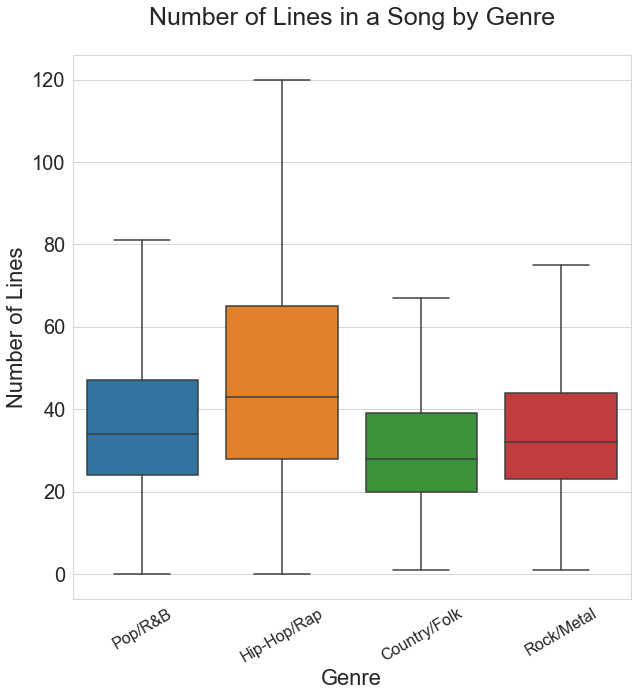

In [8]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="genre", y="num_lines", data=df, showfliers = False)

# graph attributes
plt.title('Number of Lines in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Number of Lines', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

## Find number of words in song

In [9]:
df['num_words'] = df['lines'].apply(num_words)

In [10]:
df.head()

,artist,lyrics,clean_lyrics,cleaned_lemmed_lyrics,genre,lines,num_lines,num_words
0,Ariana Grande,"I looked in my rearview mirror, (ah) and it s...",i looked in my rearview mirror ah and it seem...,i look in -PRON- rearview mirror ah and -PRO...,Pop/R&B,[ i looked in my rearview mirror ah and it see...,44,461
1,Ariana Grande,"Baby, I got love for thee so deep inside of m...",baby i got love for thee so deep inside of me...,baby i get love for thee so deep inside of -...,Pop/R&B,[ baby i got love for thee so deep inside of m...,42,437
2,Ariana Grande,"(If you wanna party, if you, if you wanna par...",if you wanna party if you if you wanna party ...,if -PRON- wanna party if -PRON- if -PRON- wa...,Pop/R&B,[ if you wanna party if you if you wanna party...,75,729
3,Ariana Grande,(Sha-la-la-la-la-la-la...)<br/>You don't need...,sha la la la la la la br you dont need a lot ...,sha la la la la la la br -PRON- do not need ...,Pop/R&B,"[ sha la la la la la la , you dont need a lot...",21,211
4,Ariana Grande,"Baby, don't you know you got all my love, all...",baby dont you know you got all my love all my...,baby do not -PRON- know -PRON- get all -PRON...,Pop/R&B,[ baby dont you know you got all my love all m...,48,444


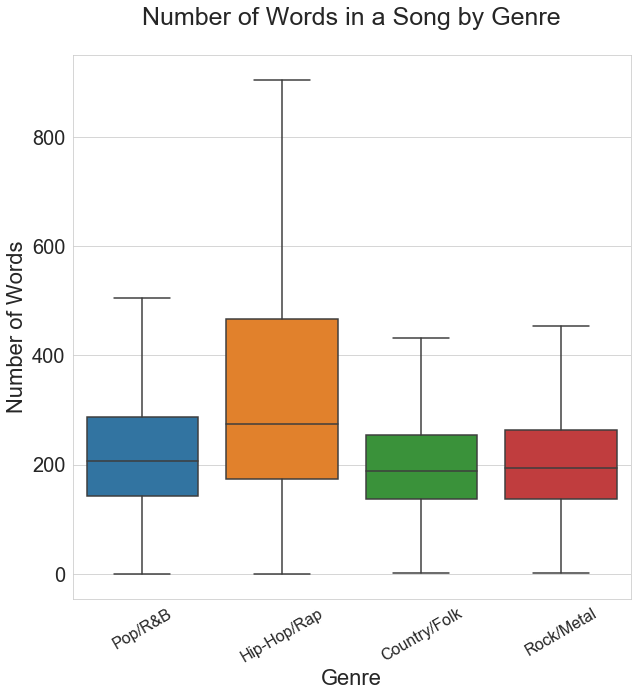

In [11]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="genre", y="num_words", data=df, showfliers = False)

# graph attributes
plt.title('Number of Words in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Number of Words', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

## Find number of words per line

In [12]:
df['words_per_line'] = df['num_words']/df['num_lines']

In [13]:
df.head()

,artist,lyrics,clean_lyrics,cleaned_lemmed_lyrics,genre,lines,num_lines,num_words,words_per_line
0,Ariana Grande,"I looked in my rearview mirror, (ah) and it s...",i looked in my rearview mirror ah and it seem...,i look in -PRON- rearview mirror ah and -PRO...,Pop/R&B,[ i looked in my rearview mirror ah and it see...,44,461,10.477273
1,Ariana Grande,"Baby, I got love for thee so deep inside of m...",baby i got love for thee so deep inside of me...,baby i get love for thee so deep inside of -...,Pop/R&B,[ baby i got love for thee so deep inside of m...,42,437,10.404762
2,Ariana Grande,"(If you wanna party, if you, if you wanna par...",if you wanna party if you if you wanna party ...,if -PRON- wanna party if -PRON- if -PRON- wa...,Pop/R&B,[ if you wanna party if you if you wanna party...,75,729,9.720000
3,Ariana Grande,(Sha-la-la-la-la-la-la...)<br/>You don't need...,sha la la la la la la br you dont need a lot ...,sha la la la la la la br -PRON- do not need ...,Pop/R&B,"[ sha la la la la la la , you dont need a lot...",21,211,10.047619
4,Ariana Grande,"Baby, don't you know you got all my love, all...",baby dont you know you got all my love all my...,baby do not -PRON- know -PRON- get all -PRON...,Pop/R&B,[ baby dont you know you got all my love all m...,48,444,9.250000


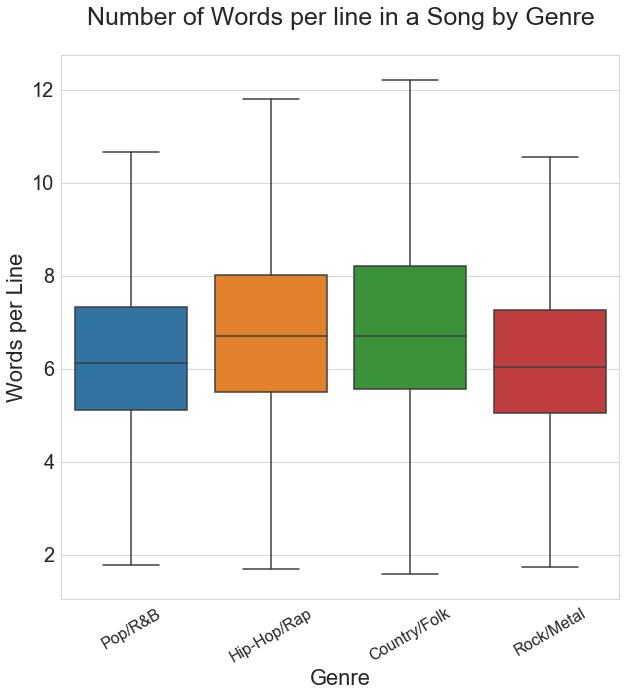

In [14]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="genre", y="words_per_line", data=df, showfliers = False)

# graph attributes
plt.title('Number of Words per line in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Words per Line', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

## Find number of unique words in a song

In [15]:
df['unique_words'] = df['clean_lyrics'].apply(lambda x: len(set(x.split())))

In [16]:
df.head()

,artist,lyrics,clean_lyrics,cleaned_lemmed_lyrics,genre,lines,num_lines,num_words,words_per_line,unique_words
0,Ariana Grande,"I looked in my rearview mirror, (ah) and it s...",i looked in my rearview mirror ah and it seem...,i look in -PRON- rearview mirror ah and -PRO...,Pop/R&B,[ i looked in my rearview mirror ah and it see...,44,461,10.477273,126
1,Ariana Grande,"Baby, I got love for thee so deep inside of m...",baby i got love for thee so deep inside of me...,baby i get love for thee so deep inside of -...,Pop/R&B,[ baby i got love for thee so deep inside of m...,42,437,10.404762,102
2,Ariana Grande,"(If you wanna party, if you, if you wanna par...",if you wanna party if you if you wanna party ...,if -PRON- wanna party if -PRON- if -PRON- wa...,Pop/R&B,[ if you wanna party if you if you wanna party...,75,729,9.720000,165
3,Ariana Grande,(Sha-la-la-la-la-la-la...)<br/>You don't need...,sha la la la la la la br you dont need a lot ...,sha la la la la la la br -PRON- do not need ...,Pop/R&B,"[ sha la la la la la la , you dont need a lot...",21,211,10.047619,84
4,Ariana Grande,"Baby, don't you know you got all my love, all...",baby dont you know you got all my love all my...,baby do not -PRON- know -PRON- get all -PRON...,Pop/R&B,[ baby dont you know you got all my love all m...,48,444,9.250000,97


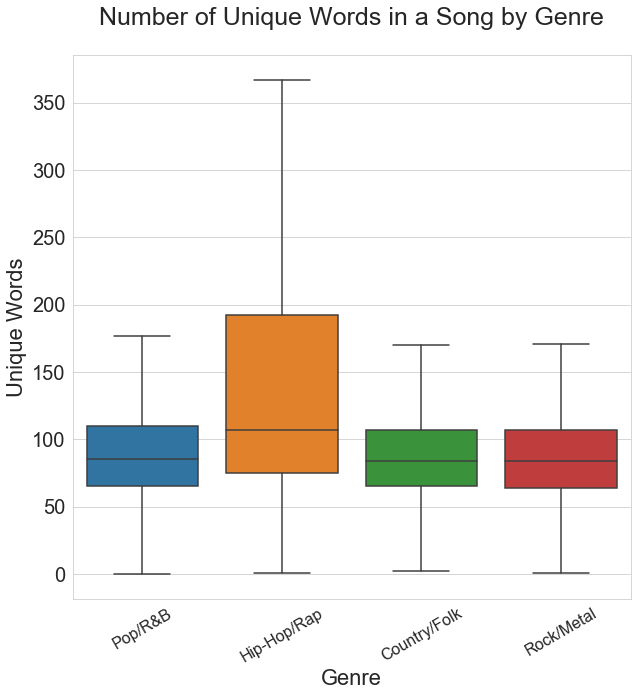

In [17]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="genre", y="unique_words", data=df, showfliers = False)

# graph attributes
plt.title('Number of Unique Words in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Unique Words', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

## Find number of explicit words used

In [18]:
df['explicit'] = df['clean_lyrics'].apply(explicit)

In [19]:
df.head()

,artist,lyrics,clean_lyrics,cleaned_lemmed_lyrics,genre,lines,num_lines,num_words,words_per_line,unique_words,explicit
0,Ariana Grande,"I looked in my rearview mirror, (ah) and it s...",i looked in my rearview mirror ah and it seem...,i look in -PRON- rearview mirror ah and -PRO...,Pop/R&B,[ i looked in my rearview mirror ah and it see...,44,461,10.477273,126,0
1,Ariana Grande,"Baby, I got love for thee so deep inside of m...",baby i got love for thee so deep inside of me...,baby i get love for thee so deep inside of -...,Pop/R&B,[ baby i got love for thee so deep inside of m...,42,437,10.404762,102,0
2,Ariana Grande,"(If you wanna party, if you, if you wanna par...",if you wanna party if you if you wanna party ...,if -PRON- wanna party if -PRON- if -PRON- wa...,Pop/R&B,[ if you wanna party if you if you wanna party...,75,729,9.720000,165,0
3,Ariana Grande,(Sha-la-la-la-la-la-la...)<br/>You don't need...,sha la la la la la la br you dont need a lot ...,sha la la la la la la br -PRON- do not need ...,Pop/R&B,"[ sha la la la la la la , you dont need a lot...",21,211,10.047619,84,0
4,Ariana Grande,"Baby, don't you know you got all my love, all...",baby dont you know you got all my love all my...,baby do not -PRON- know -PRON- get all -PRON...,Pop/R&B,[ baby dont you know you got all my love all m...,48,444,9.250000,97,0


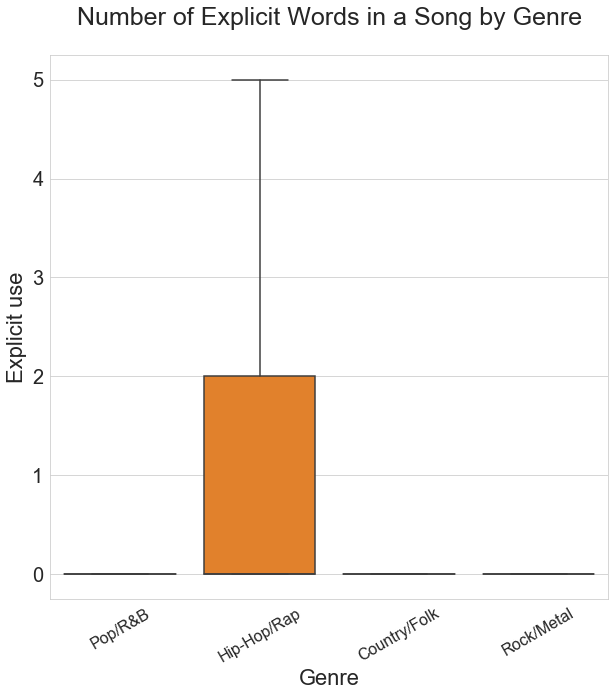

In [20]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="genre", y="explicit", data=df, showfliers = False)

# graph attributes
plt.title('Number of Explicit Words in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Explicit use', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

In [ ]:
# export dataframe for modeling/ngram analysis
df.to_csv('modeling_df.csv')

In [2]:
# import dataframe for ngram analysis (kernel kept dying)
df = pd.read_csv('modeling_df.csv', index_col = 0)

In [5]:
#function to find highest count n-gram
def n_gram(df_col, n=None):
    # Build the vectorizer, specify inputted n-gram, remove stop words
    vect = CountVectorizer(ngram_range = (n,n), max_df = 200, stop_words = stopwords_list)
    # fit/transform vectorizer on specified column
    vect_fit = vect.fit_transform(df_col)
    # get all words and store in a list
    word_list = vect.get_feature_names()
    # get a count of all the words
    count_list = vect_fit.toarray().sum(axis=0)
    #create a dictionary of word to count pairings
    count_dict = dict(zip(word_list, count_list))
    # sort the dictionary to show highest counted words on top
    sort_vocab = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)
    
    return sort_vocab

In [4]:
# create stopwords and update as spacy lemmatizer converts all pronouns (i, we, us, etc..) to -PRON-
stopwords_list = stopwords.words('english')+['pron', '-PRON-', 'br']
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Unigrams

In [ ]:
# get top words for full df
full_vocab = n_gram(df['cleaned_lemmed_lyrics'], n=1)

In [13]:
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])

,Word,Count
0,get,872408
1,go,717730
2,know,593172
3,love,591055
4,like,522536


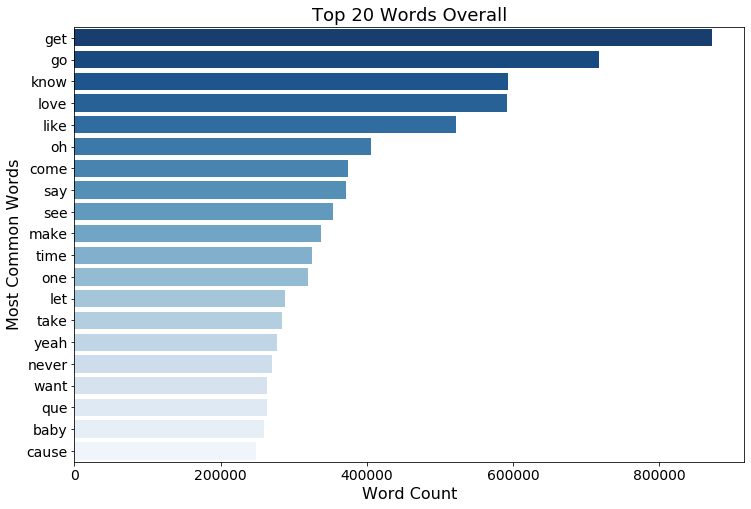

In [14]:
#bar plot for top 20 words
plt.figure(figsize=(12,8))
sns.barplot(unigram_full['Count'],unigram_full['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Words Overall',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [9]:
# get top words for pop genre
pop_vocab = n_gram(df[df['genre'] == 'Pop/R&B']['cleaned_lemmed_lyrics'], n=1)

In [15]:
unigram_pop = pd.DataFrame(pop_vocab[:20], columns = ['Word','Count'])

,Word,Count
0,get,307321
1,go,275850
2,love,259008
3,know,235032
4,like,187394


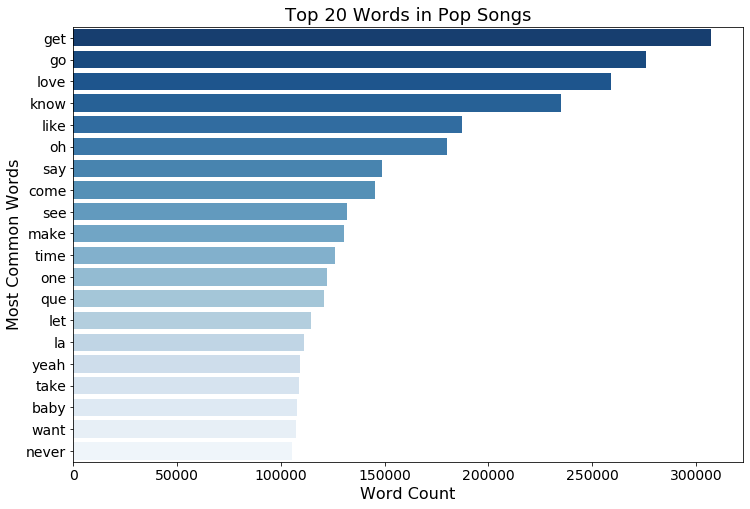

In [17]:
#bar plot for top 20 words in pop
plt.figure(figsize=(12,8))
sns.barplot(unigram_pop['Count'],unigram_pop['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Words in Pop Songs',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [10]:
# get top words for rap genre
rap_vocab = n_gram(df[df['genre'] == 'Hip-Hop/Rap']['cleaned_lemmed_lyrics'], n=1)

In [18]:
unigram_rap = pd.DataFrame(rap_vocab[:20], columns = ['Word','Count'])

,Word,Count
0,get,286705
1,like,171760
2,go,169827
3,know,152142
4,love,118469


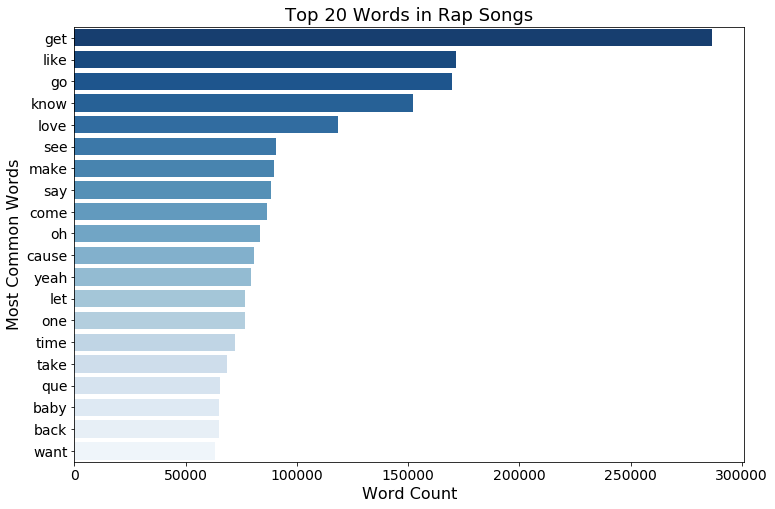

In [20]:
#bar plot for top 20 words in rap
plt.figure(figsize=(12,8))
sns.barplot(unigram_rap['Count'],unigram_rap['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Words in Rap Songs',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

## Trigrams

In [ ]:
# get top words for full df
full_vocab3 = n_gram(df['cleaned_lemmed_lyrics'], n=3)

In [ ]:
trigram_full = pd.DataFrame(full_vocab3[:20], columns = ['Word','Count'])
trigram_full.head(20)

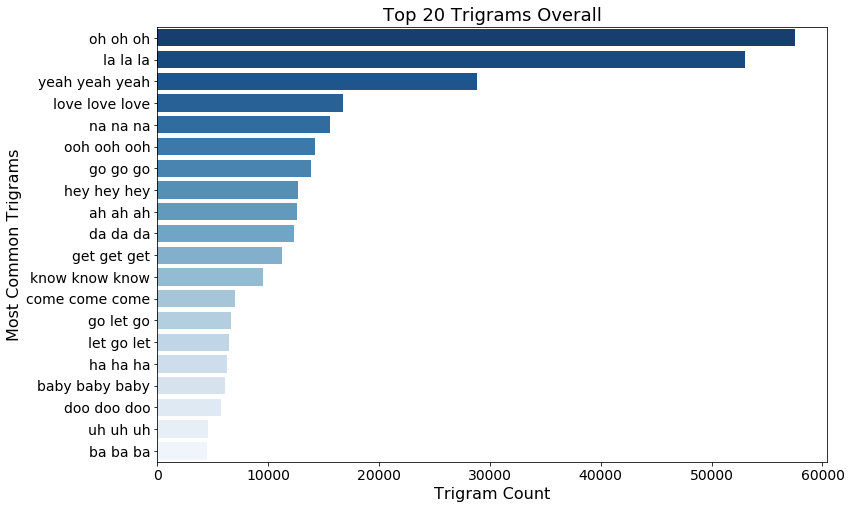

In [27]:
#bar plot for top 20 words
plt.figure(figsize=(12,8))
sns.barplot(trigram_full['Count'],trigram_full['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Trigrams Overall',fontsize=18)
plt.ylabel('Most Common Trigrams',fontsize=16)
plt.xlabel('Trigram Count',fontsize=16)
sns.set_style()
plt.show()

## Baseline

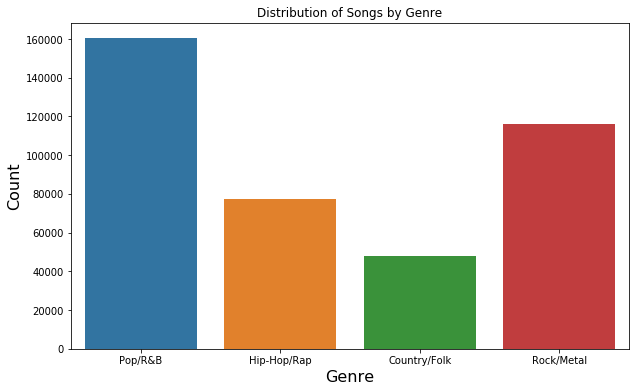

In [11]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="genre", data=df)
plt.title("Distribution of Songs by Genre")
plt.ylabel('Count',fontsize=16)
plt.xlabel('Genre',fontsize=16)
plt.xticks(np.arange(4), ('Pop/R&B', 'Hip-Hop/Rap', 'Country/Folk', 'Rock/Metal'))
plt.show()